# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() # To check if there is any missing data or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts() # Counts the frequency of diffrent numbers

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283924,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704682,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# import matplotlib.pyplot as plt

In [8]:
# housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [9]:
# For learing function
def split_train_test(data,test_ratio):
    np.random.seed(42) # This will fix the randomize of the data
    shuffled = np.random.permutation(len(data)) # It will randomize the data
    test_set_size = int(len(data)*test_ratio)  # Total length of data * 0.2
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]


In [10]:
train_set , test_set = split_train_test(housing,0.2)

In [11]:
print("Train set:",len(train_set))
print("Test set:",len(test_set))

Train set: 405
Test set: 101


In [12]:
# This function is already there in sikit-learn 😂😂
# Now using sikit-learn

In [13]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)
print("Train set:",len(train_set))
print("Test set:",len(test_set))

Train set: 404
Test set: 102


In [14]:
# The above method cannot be use here
# As CHAS contains only 35 times 1 out out 506 so we need to Strayified shuffling 

## Stratified shuffling

In [15]:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc [train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
# strat_test_set['CHAS'].value_counts()
# strat_train_set['CHAS'].value_counts()

## Looking for Correlation
#### We should only take the training data for this but right now our data is less so we are checking with whole data

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False) # Checking the correlations of featues with the price of the house

MEDV       1.000000
RM         0.694444
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

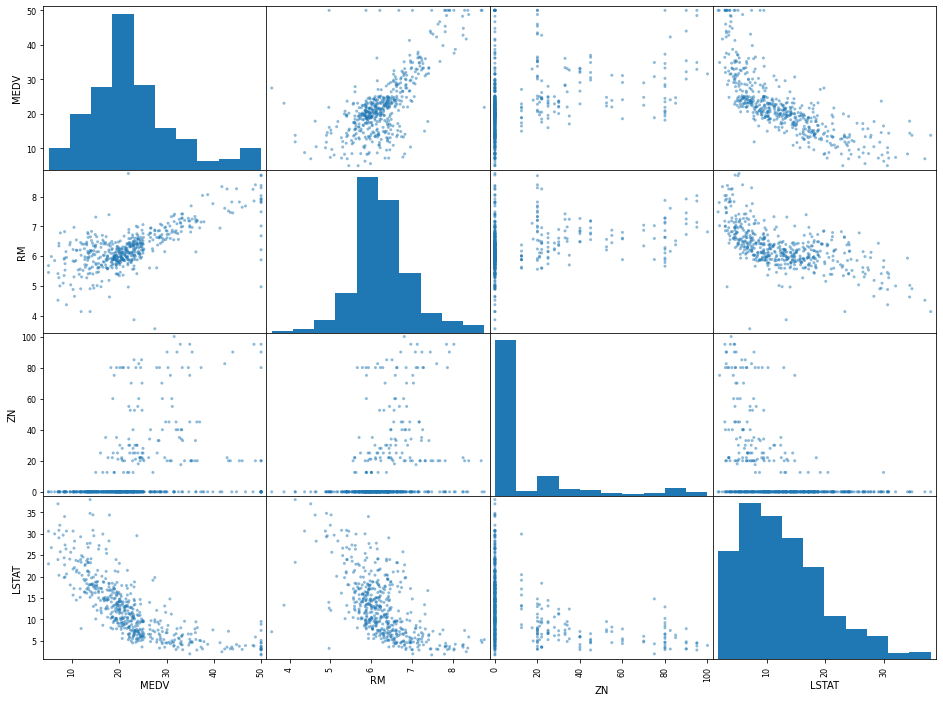

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV" , "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes],figsize=(16,12))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

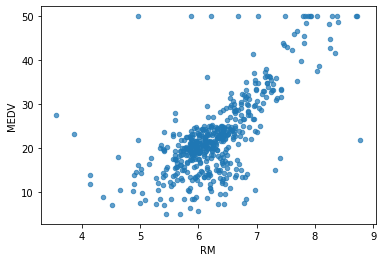

In [20]:
housing.plot(kind="scatter",x="RM",y="MEDV", alpha=0.7) 
# Here we can remove the outlets to make our model more accurate

In [21]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attribute

In [22]:
# To take care of the missing attributes, you have three options:-
#    1) Get rid of the missing data points
#    2) Get rid of the whole attribute
#    3) Set the value to 0 or mean or median


In [23]:
a=housing.dropna(subset=["RM"]) # Option 1
a.shape

(400, 13)

In [24]:
housing.drop("RM",axis=1) # Option 2

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [25]:
median = housing["RM"].median() # Compute median for option 3
housing["RM"].fillna(median) # Option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
# Calculating the median for every feature which can be used if the user gives an empty value at run-time 

SimpleImputer(strategy='median')

In [27]:
X = imputer.transform(housing)

In [28]:
housing_new = pd.DataFrame(X, columns=housing.columns) # creating new housing data with filling all missing attribute

In [29]:
housing_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279418,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711587,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

Primarily, three types ofobjects:
1) Estimators - It estimate some parameter based on a dataset. Eg Imputer

It has fit method and transform method

Fit Method - fits the dataset and calculate parameters
    
2) Transformers - transform method takes input and returns output based on the learnings from fit()

3) Predictors - Linear Regression is an example of predictor. fit() and predict() are two common functions.

## Feature Scaling

Primarily, two types of feature scaling methods:

1. Min-max scaling (Normalization)

    (value-min)/(max-min)
    
    Sklearn provides a class called MinMaxScaler for this 
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called Standard Scaler for this 

## Creating a Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
    
])

In [31]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

## Selecting a desired model

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [33]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [34]:
model.predict(prepared_data)

array([23.94531721, 27.20861433, 20.55726629, 25.05258463, 23.76340842])

In [35]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [36]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_prediction)
lin_rmse = np.sqrt(lin_mse)

In [37]:
lin_rmse

4.838958093967634

## As the error is big so using new model

In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [39]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [41]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [42]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_prediction)
rmse = np.sqrt(mse)

In [43]:
rmse

0.0

#### The second model has done Overfitting
## Using Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr,housing_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [45]:
rmse_scores

array([4.14349328, 5.51556556, 5.25301307, 3.91382789, 4.57698045,
       3.83327536, 7.42192697, 3.82439538, 3.66997956, 3.75712656])